Phospho for Interacting Proteins

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

In [3]:
gbm = cptac.Gbm()
endo = cptac.Endometrial()
h = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
col = cptac.Colon()
b = cptac.Brca()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)


In [46]:
ip = u.get_interacting_proteins('PTEN')
len(ip)
ip.append('PDK1')
ip.append('GRB2')
ip.append('mTOR')
ip.append('mTORC2')
ip.append('SOS')
ip.append('GAB1')
ip.append('RAS')
ip.append('RAF-1')
   

In [43]:
ip

['MDM2',
 'CSNK2A1',
 'PDGFRB',
 'PIK3R2',
 'PIK3C3',
 'CSNK2A2',
 'SLC9A3R1',
 'PIK3R3',
 'USP13',
 'PIK3CA',
 'TP53',
 'EGFR',
 'PIK3CB',
 'PTK2',
 'USP7',
 'XIAP',
 'PTEN',
 'PREX2',
 'MAST2',
 'PIK3CD',
 'ROCK1',
 'SHC1',
 'NEDD4',
 'INPP4B',
 'PIK3R1',
 'AKT1',
 'MVP',
 'MAGI3',
 'PDK1',
 'GRB2']

In [5]:
gene = 'PTEN'

# Gbm

In [47]:
mut_type_gbm = gbm.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
prot_and_mutations = gbm.reduce_multiindex(prot_and_mutations, levels_to_drop = 3, flatten = True)

ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()
del_wt

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: PDK1, PIK3CB, PIK3R3, RAF-1, RAS, SOS, USP13, mTOR, mTORC2 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Norma

Name,AKT1_phosphoproteomics_S122S124S126_S*GS*PS*DNSGAEEMEVSLAK,AKT1_phosphoproteomics_S122S129_S*GSPSDNS*GAEEMEVSLAK,AKT1_phosphoproteomics_S124_SGS*PSDNSGAEEMEVSLAK,AKT1_phosphoproteomics_S124S126_SGS*PS*DNSGAEEMEVSLAK,AKT1_phosphoproteomics_S124S126S129_SGS*PS*DNS*GAEEMEVSLAK,AKT1_phosphoproteomics_S124S129_SGS*PSDNS*GAEEMEVSLAK,AKT1_phosphoproteomics_S126_SGSPS*DNSGAEEMEVSLAK,AKT1_phosphoproteomics_S126S129_SGSPS*DNS*GAEEMEVSLAK,AKT1_phosphoproteomics_S129_SGSPSDNS*GAEEMEVSLAK,AKT1_phosphoproteomics_T450_YFDEEFTAQMITIT*PPDQDDSMECVDSER,...,USP7_phosphoproteomics_S49_ITQNPVINGNVALS*DGHNTAEEDMEDDTSWR,USP7_phosphoproteomics_S49T54_ITQNPVINGNVALS*DGHNT*AEEDMEDDTSWR,USP7_phosphoproteomics_S963_IIGVHQEDELLECLS*PATSR,USP7_phosphoproteomics_T54_ITQNPVINGNVALSDGHNT*AEEDMEDDTSWR,USP7_phosphoproteomics_Y143S149S151_IINY*RDDEKS*FS*RR,XIAP_phosphoproteomics_S361T363_TPS*LT*RR,XIAP_phosphoproteomics_S406_S*LEVLVADLVNAQK,mTOR_phosphoproteomics,mTORC2_phosphoproteomics,Mutation
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,NaN,NaN,-0.266735,NaN,-0.003699,NaN,-0.278996,-0.258196,-0.023265,NaN,...,0.563429,NaN,-0.232297,-0.669862,NaN,0.066926,NaN,NaN,NaN,Deletion
C3L-00365,NaN,NaN,NaN,-0.126213,0.167336,NaN,-0.444445,-0.306907,0.249322,NaN,...,-0.049760,-0.628643,-0.133168,0.074903,NaN,NaN,NaN,NaN,NaN,Deletion
C3L-00674,NaN,NaN,-0.099868,0.415818,-0.025736,NaN,-0.442646,0.283930,0.080429,0.595095,...,-0.927193,NaN,0.251479,0.878238,-0.126044,NaN,-0.346832,NaN,NaN,Deletion
C3L-00677,NaN,NaN,-0.474102,0.157080,0.081324,-0.256534,-0.261877,-0.069383,NaN,NaN,...,NaN,NaN,0.476500,0.726599,NaN,NaN,-0.443770,NaN,NaN,Deletion
C3L-01040,NaN,NaN,0.213932,NaN,0.081431,NaN,-0.187680,0.093658,0.149175,NaN,...,-0.012185,NaN,0.228913,0.294451,NaN,-0.155544,NaN,NaN,NaN,Deletion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03183,0.135839,NaN,-0.048229,NaN,0.333319,NaN,NaN,0.073602,0.435285,NaN,...,0.487404,-0.104482,-0.721475,-0.144328,NaN,NaN,NaN,NaN,NaN,Deletion
C3N-03184,NaN,NaN,NaN,0.029779,0.562808,0.375545,-0.122466,-0.212794,0.082460,NaN,...,-0.465976,-0.311864,0.048687,NaN,NaN,NaN,NaN,NaN,NaN,Deletion
C3N-03186,NaN,NaN,0.190067,0.204214,-0.020094,0.208449,NaN,-0.129185,NaN,-0.293418,...,-0.348798,NaN,-0.024489,0.244612,NaN,NaN,0.455009,NaN,NaN,Deletion


In [11]:
cols = list(del_wt.columns[:-1])

# Get only sig sites
g_sig = u.wrap_ttest(del_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if g_sig is not None:
    g_sig_list = list(g_sig.Comparison)
else: 
    g_sig_list = None

print('significant pvals: \n', g_sig)
# Get all pvals
g = u.wrap_ttest(del_wt, 'Mutation', cols,return_all = True, correction_method = 'fdr_bh')
g_pval = g.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'Gbm_P_Value'})
g_pval

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\brittany henderson\Anaconda3\e

significant pvals: 
 None


,Phosphoproteomics,Gbm_P_Value
0,PTK2_phosphoproteomics_T660Y661_YMEDST*Y*YK,0.000220
1,SLC9A3R1_phosphoproteomics_S280_EALAEAALES*PRP...,0.001065
2,PIK3R1_phosphoproteomics_S83_KIS*PPTPK,0.001357
3,EGFR_phosphoproteomics_S1042S1045_TPLLSSLSATS*...,0.001429
4,AKT1_phosphoproteomics_S124S126S129_SGS*PS*DNS...,0.001594
...,...,...
338,SLC9A3R1_phosphoproteomics_S288T293_S*ASSDT*SE...,NaN
339,SLC9A3R1_phosphoproteomics_S291S294S299_SASS*D...,NaN
340,USP13_phosphoproteomics,NaN
341,USP7_phosphoproteomics_Y143S149S151_IINY*RDDEK...,NaN


In [14]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

gbm_d = {}

for phos in cols:
    dif_gbm = wt_med[phos] - del_med[phos]
    gbm_d[phos] = dif_gbm

gbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm_Median'])
gbm_df = gbm_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
gbm_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,Gbm_Median
0,AKT1_phosphoproteomics_S122S124S126_S*GS*PS*DN...,-0.278248
1,AKT1_phosphoproteomics_S122S129_S*GSPSDNS*GAEE...,NaN
2,AKT1_phosphoproteomics_S124_SGS*PSDNSGAEEMEVSLAK,0.098392
3,AKT1_phosphoproteomics_S124S126_SGS*PS*DNSGAEE...,-0.264459
4,AKT1_phosphoproteomics_S124S126S129_SGS*PS*DNS...,-0.299351
...,...,...
338,USP7_phosphoproteomics_S963_IIGVHQEDELLECLS*PATSR,0.197240
339,USP7_phosphoproteomics_T54_ITQNPVINGNVALSDGHNT...,-0.073719
340,USP7_phosphoproteomics_Y143S149S151_IINY*RDDEK...,NaN
341,XIAP_phosphoproteomics_S361T363_TPS*LT*RR,-0.041787


In [21]:
g_merged = g_pval.merge(gbm_df, on='Phosphoproteomics',how='outer')
g_merged = g_merged.replace(to_replace = r'_phosphoproteomics', value = '', regex = True)
g_merged = g_merged.replace(to_replace = r'_[A-Z\*]*$', value = '', regex = True)
g_merged

,Phosphoproteomics,Gbm_P_Value,Gbm_Median
0,PTK2_T660Y661,0.000220,-0.764033
1,SLC9A3R1_S280,0.001065,0.728675
2,PIK3R1_S83,0.001357,0.580407
3,EGFR_S1042S1045,0.001429,-0.349234
4,AKT1_S124S126S129,0.001594,-0.299351
...,...,...,...
338,SLC9A3R1_S288T293,NaN,NaN
339,SLC9A3R1_S291S294S299,NaN,-0.559956
340,USP13,NaN,NaN
341,USP7_Y143S149S151,NaN,NaN


# Endo

In [29]:
mut_type = endo.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = endo.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
prot_and_mutations = endo.reduce_multiindex(prot_and_mutations, flatten = True)
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type = mut_type[['Mutation']] 
merged = ip_df.join(mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Nonsense_Mutation','Frame_Shift_Ins','Frame_Shift_Del']
get = merged['Mutation'].isin(compare)
trunc_wt = merged[get]
trunc_wt['Mutation'] = np.where(
                trunc_wt['Mutation'] == 'Wildtype_Tumor', 'Wildtype_Tumor', 'Truncation')
trunc_wt['Mutation'].value_counts()
trunc_wt[['EGFR_phosphoproteomics_S1064']]

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 20 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: CSNK2A1, PIK3CB, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is try

Name,EGFR_phosphoproteomics_S1064
Patient_ID,
C3L-00006,0.2970
C3L-00032,0.0316
C3L-00098,-2.3100
C3L-00137,0.2360
C3L-00139,0.8160
...,...
C3N-01520,NaN
C3N-01521,-2.3700
C3N-01537,NaN


In [31]:
cols = list(trunc_wt.columns[:-1])

# Get only sig sites
e_sig = u.wrap_ttest(trunc_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if e_sig is not None:
    e_sig_list = list(e_sig.Comparison)
else: 
    e_sig_list = None

print('significant pvals: \n', e_sig)
# Get all pvals
e_pval = u.wrap_ttest(trunc_wt, 'Mutation', cols, return_all = True,correction_method = 'fdr_bh')
e_pval = e_pval.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'En_P_Value'})
e_pval

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\brittany henderson\Anaconda3\e

significant pvals: 
 None


,Phosphoproteomics,En_P_Value
23,EGFR_phosphoproteomics_S1064,0.069452


In [33]:
t = trunc_wt[trunc_wt.Mutation == "Truncation"]
wt = trunc_wt[trunc_wt.Mutation == "Wildtype_Tumor"]
trunc_med = t.median()
wt_med = wt.median()

en_d = {}

for phos in cols:
    dif = wt_med[phos] - trunc_med[phos]
    en_d[phos] = dif

en_df = pd.DataFrame.from_dict(en_d, orient='index', columns=['En_Median'])
en_df = en_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
en_df.loc[en_df['Phosphoproteomics'] == 'EGFR_phosphoproteomics_S1064']

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,En_Median
14,EGFR_phosphoproteomics_S1064,-0.407


In [34]:
e_merged = e_pval.merge(en_df, on='Phosphoproteomics',how='outer')
#e_merged['EGFR_phosphoproteomics_S1064']
e_merged.loc[e_merged['Phosphoproteomics'] == 'EGFR_phosphoproteomics_S1064']

,Phosphoproteomics,En_P_Value,En_Median
23,EGFR_phosphoproteomics_S1064,0.069452,-0.407


# Ovarian

In [211]:
gene = 'PTEN'

mut_type = o.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = o.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples

# accounting for duplicates (keep peptide)
prot_and_mutations = o.reduce_multiindex(prot_and_mutations, levels_to_drop = 3, flatten=True)

prot_and_mutations = prot_and_mutations.loc[:,~prot_and_mutations.columns.duplicated()] # drop perfect duplicate columns 
# dropped 244 perfect duplicate cols  
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type = mut_type[['Mutation']] 
merged = ip_df.join(mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()
print(len(del_wt.columns))
del_wt = del_wt.dropna(axis = 'columns', how='all')

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 98 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV029, 02OV015 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: CSNK2A1, INPP4B, PIK3CB (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 7)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PTEN g

157


cptac warning: Due to dropping the specified levels, dataframe now has 328 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 11)


In [212]:
# check same peptide, dif database id
del_wt.columns.value_counts()
t = del_wt['NEDD4_phosphoproteomics_S739_R.LTIFGNSAVSQPASSS*NHSSR.R']
t

Patient_ID
01OV007      NaN
01OV017      NaN
01OV018      NaN
01OV023   -3.005
01OV026      NaN
           ...  
26OV002      NaN
26OV008      NaN
26OV009      NaN
26OV011      NaN
26OV013   -2.135
Name: NEDD4_phosphoproteomics_S739_R.LTIFGNSAVSQPASSS*NHSSR.R, Length: 66, dtype: float64

In [213]:
cols = list(del_wt.columns[:-1])

# Get only sig sites
o_sig = u.wrap_ttest(del_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if o_sig is not None:
    o_sig_list = list(o_sig.Comparison)
else: 
    o_sig_list = None
print('significant pvals: \n',o_sig)

# Get all pvals
o_pval = u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True, correction_method = 'fdr_bh')
o_pval = o_pval.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'Ov_P_Value'})
o_pval

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\brittany henderson\Anaconda3\e

significant pvals: 
 None


,Phosphoproteomics,Ov_P_Value
0,PIK3R1_phosphoproteomics_Y470_R.LYEEY*TR.T,0.002950
1,PIK3R3_phosphoproteomics_Y219_R.LYEEY*TR.T,0.002950
2,NEDD4_phosphoproteomics_S884_R.GKTS*LDTSNDLGPL...,0.004646
3,EGFR_phosphoproteomics_S1104_P.AGS*VQNPVYHNQPL...,0.007877
4,EGFR_phosphoproteomics_S991_R.MHLPS*PTDSNFYR.A,0.029326
...,...,...
148,SLC9A3R1_phosphoproteomics_S280_R.EALAEAALES*P...,NaN
149,SLC9A3R1_phosphoproteomics_S288_R.S*ASSDTSEELN...,NaN
150,SLC9A3R1_phosphoproteomics_S291S302_R.SASS*DTS...,NaN
151,XIAP_phosphoproteomics_S87_R.KVS*PNCR.F,NaN


In [214]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

ov_d = {}

for phos in cols:
    dif = wt_med[phos] - del_med[phos]
    ov_d[phos] = dif

o_df = pd.DataFrame.from_dict(ov_d, orient='index', columns=['Ov_Median'])
o_df = o_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
o_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,Ov_Median
0,AKT1_phosphoproteomics_S124_R.SGS*PSDNSGAEEMEV...,-0.2670
1,AKT1_phosphoproteomics_S126_R.SGSPS*DNSGAEEMEV...,0.0810
2,AKT1_phosphoproteomics_S126_R.SGSPS*DNSGAEEMEV...,-0.3165
3,AKT1_phosphoproteomics_S129_R.SGSPSDNS*GAEEMEV...,-0.1040
4,AKT1_phosphoproteomics_T450_I.TIT*PPDQDDSMECVD...,0.2370
...,...,...
148,USP7_phosphoproteomics_S18_K.AGEQQLS*EPEDMEMEA...,0.3790
149,XIAP_phosphoproteomics_S402_K.IQISGS*NYK.S,-1.1640
150,XIAP_phosphoproteomics_S87_R.KVS*PNCR.F,-0.4010
151,XIAP_phosphoproteomics_T356_R.TT*EKTPSLTR.R,0.8270


In [215]:
o_merged = o_pval.merge(o_df, on='Phosphoproteomics',how='outer')
o_merged = o_merged.replace(to_replace = r'_phosphoproteomics', value = '', regex = True)
#o_merged = o_merged.replace(to_replace = r'_[A-Z.*]*$', value = '', regex = True)
o_merged

,Phosphoproteomics,Ov_P_Value,Ov_Median
0,PIK3R1_Y470,0.002950,-0.6640
1,PIK3R3_Y219,0.002950,-0.6640
2,NEDD4_S884,0.004646,-0.4495
3,EGFR_S1104,0.007877,-0.6180
4,EGFR_S991,0.029326,-1.0500
...,...,...,...
148,SLC9A3R1_S280,NaN,-0.3780
149,SLC9A3R1_S288,NaN,-0.5650
150,SLC9A3R1_S291S302,NaN,-0.3350
151,XIAP_S87,NaN,-0.4010


# Breast

In [216]:
mut_type = b.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = b.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = ip)
#prot_and_mutations = prot_and_mutations.loc[:,~prot_and_mutations.columns.duplicated()] # drop duplicated columns
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
prot_and_mutations = b.reduce_multiindex(prot_and_mutations, levels_to_drop = 3)
prot_and_mutations = b.reduce_multiindex(prot_and_mutations, levels_to_drop = 2, flatten = True)

ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type = mut_type[['Mutation']] 
merged = ip_df.join(mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: INPP4B, PIK3CB, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)


Wildtype_Tumor    80
Deletion          24
Name: Mutation, dtype: int64

In [217]:
cols = list(del_wt.columns[:-1])

# Get only sig sites
b_sig = u.wrap_ttest(del_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if b_sig is not None:
    b_sig_list = list(b_sig.Comparison)
else: 
    b_sig_list = None
print('significant pvals: \n',b_sig)

# Get all pvals
b_pval = u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True, correction_method = 'fdr_bh')
b_pval = b_pval.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'Brca_P_Value'})
b_pval

significant pvals: 
 None


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:328: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


,Phosphoproteomics,Brca_P_Value
0,MAST2_phosphoproteomics_S74S81,0.003703
1,MAGI3_phosphoproteomics_S1407,0.005574
2,SLC9A3R1_phosphoproteomics_S170,0.007694
3,ROCK1_phosphoproteomics_S2,0.008402
4,CSNK2A2_phosphoproteomics_S18,0.011835
...,...,...
136,USP7_phosphoproteomics_S963,0.973910
137,MAST2_phosphoproteomics_S92,0.983045
138,INPP4B_phosphoproteomics,NaN
139,PIK3CB_phosphoproteomics,NaN


In [218]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

b_d = {}

for phos in cols:
    dif = wt_med[phos] - del_med[phos]
    b_d[phos] = dif

b_df = pd.DataFrame.from_dict(b_d, orient='index', columns=['Brca_Median'])
b_df = b_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
b_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,Brca_Median
0,AKT1_phosphoproteomics_M446T450,0.51865
1,AKT1_phosphoproteomics_S124S126S129,-0.37585
2,AKT1_phosphoproteomics_S126,0.13445
3,AKT1_phosphoproteomics_S126S129,-0.16085
4,AKT1_phosphoproteomics_S129,0.02820
...,...,...
136,USP7_phosphoproteomics_S49T54,-0.43095
137,USP7_phosphoproteomics_S752,0.09245
138,USP7_phosphoproteomics_S963,0.03725
139,XIAP_phosphoproteomics_S402,-0.26415


In [219]:
b_merged = b_pval.merge(b_df, on='Phosphoproteomics',how='outer')
b_merged = b_merged.replace(to_replace = r'_phosphoproteomics', value = '', regex = True)
b_merged

,Phosphoproteomics,Brca_P_Value,Brca_Median
0,MAST2_S74S81,0.003703,-0.96550
1,MAGI3_S1407,0.005574,-1.31335
2,SLC9A3R1_S170,0.007694,1.33170
3,ROCK1_S2,0.008402,0.91895
4,CSNK2A2_S18,0.011835,-0.66225
...,...,...,...
136,USP7_S963,0.973910,0.03725
137,MAST2_S92,0.983045,0.23720
138,INPP4B,NaN,NaN
139,PIK3CB,NaN,NaN


# Colon

In [220]:
mut_type = col.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = col.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
#prot_and_mutations = col.reduce_multiindex(prot_and_mutations, levels_to_drop = 3)
prot_and_mutations = col.reduce_multiindex(prot_and_mutations, levels_to_drop = 2, flatten = True)
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type = mut_type[['Mutation']] 
merged = ip_df.join(mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()
prot_and_mutations

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 100 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: CSNK2A2, INPP4B, MDM2, PIK3CA, PIK3CB, PIK3R3, PREX2 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 201 

Name,AKT1_phosphoproteomics_S124,AKT1_phosphoproteomics_S126,AKT1_phosphoproteomics_S129,AKT1_phosphoproteomics_S137,AKT1_phosphoproteomics_T450,CSNK2A1_phosphoproteomics_S370,CSNK2A2_phosphoproteomics,EGFR_phosphoproteomics_S1026,EGFR_phosphoproteomics_S1039,EGFR_phosphoproteomics_S1042,...,TP53_phosphoproteomics_S314,TP53_phosphoproteomics_S315,USP13_phosphoproteomics_T122,USP7_phosphoproteomics_S18,USP7_phosphoproteomics_S963,XIAP_phosphoproteomics_S430,PTEN_Mutation_,PTEN_Location_,PTEN_Mutation_Status_,Sample_Status_
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01CO005,NaN,-0.5140,-0.5140,NaN,-0.566,NaN,NaN,NaN,NaN,-0.104,...,NaN,-1.280,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01CO006,-0.0240,-0.0375,0.0325,NaN,-1.162,-1.052,NaN,NaN,0.154,-0.395,...,NaN,-0.996,NaN,-0.672,-0.275,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01CO008,NaN,-0.2470,-0.2470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01CO013,-0.3455,0.0580,-0.2170,-0.628,-0.224,NaN,NaN,NaN,-0.234,-0.432,...,NaN,NaN,NaN,-0.293,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO007,NaN,NaN,-0.1240,NaN,-0.484,NaN,NaN,NaN,NaN,NaN,...,NaN,0.353,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
22CO004,NaN,-0.3275,-0.3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.155,-0.267,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
22CO006,NaN,0.0880,0.0880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


In [221]:
cols = list(del_wt.columns[:-1])

# Get only sig sites
c_sig = u.wrap_ttest(del_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if c_sig is not None:
    c_sig_list = list(c_sig.Comparison)
else: 
    c_sig_list = None
print('significant pvals: \n',c_sig)

# Get all pvals
c_pval = u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True, correction_method = 'fdr_bh')
c_pval = c_pval.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'Colon_P_Value'})
c_pval

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\brittany henderson\Anaconda3\e

significant pvals: 
 None


,Phosphoproteomics,Colon_P_Value
0,MAST2_phosphoproteomics_S278,0.002148
1,MAST2_phosphoproteomics_S209,0.003531
2,PTK2_phosphoproteomics_Y861,0.019399
3,MAST2_phosphoproteomics_S148,0.062725
4,MAGI3_phosphoproteomics_S989,0.068431
...,...,...
108,PTK2_phosphoproteomics_S390,NaN
109,PTK2_phosphoproteomics_S392,NaN
110,TP53_phosphoproteomics_S314,NaN
111,USP13_phosphoproteomics_T122,NaN


In [222]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

d = {}

for phos in cols:
    dif = wt_med[phos] - del_med[phos]
    d[phos] = dif

c_df = pd.DataFrame.from_dict(d, orient='index', columns=['Colon_Median'])
c_df = c_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
c_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,Colon_Median
0,AKT1_phosphoproteomics_S124,-0.18700
1,AKT1_phosphoproteomics_S126,-0.14525
2,AKT1_phosphoproteomics_S129,-0.11200
3,AKT1_phosphoproteomics_S137,-0.26950
4,AKT1_phosphoproteomics_T450,0.08800
...,...,...
108,TP53_phosphoproteomics_S315,0.29800
109,USP13_phosphoproteomics_T122,-0.25500
110,USP7_phosphoproteomics_S18,0.08650
111,USP7_phosphoproteomics_S963,-0.23100


In [223]:
c_merged = c_pval.merge(c_df, on='Phosphoproteomics',how='outer')
c_merged = c_merged.replace(to_replace = r'_phosphoproteomics', value = '', regex = True)
c_merged

,Phosphoproteomics,Colon_P_Value,Colon_Median
0,MAST2_S278,0.002148,-0.45350
1,MAST2_S209,0.003531,0.34750
2,PTK2_Y861,0.019399,-0.36075
3,MAST2_S148,0.062725,0.10150
4,MAGI3_S989,0.068431,-0.42250
...,...,...,...
108,PTK2_S390,NaN,0.35150
109,PTK2_S392,NaN,0.35150
110,TP53_S314,NaN,NaN
111,USP13_T122,NaN,-0.25500


# Head and Neck

In [224]:
mut_type = h.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = h.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'phosphoproteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples

# CODE accounting for duplicates (keep peptide)
#prot_and_mutations = h.reduce_multiindex(prot_and_mutations, levels_to_drop = 3)
prot_and_mutations = h.reduce_multiindex(prot_and_mutations, levels_to_drop = 3, flatten=True)
#prot_and_mutations = prot_and_mutations.loc[:,~prot_and_mutations.columns.duplicated()] # drop duplicated columns


ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type = mut_type[['Mutation']] 
merged = ip_df.join(mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()
del_wt.head()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 109 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: CSNK2A1, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 176 samples for the PTEN gen

Name,AKT1_phosphoproteomics_S457_YFDEEFTAQMITITPPDQDDsMECVDSER,AKT1_phosphoproteomics_S477_RPHFPQFSYSAsGTA,AKT1_phosphoproteomics_T450_YFDEEFTAQMITItPPDQDDSMECVDSER,CSNK2A1_phosphoproteomics,CSNK2A2_phosphoproteomics_S18_VYAEVNsLR,EGFR_phosphoproteomics_S1025_ALMDEEDMDDVVDADEYLIPQQGFFsSPSTSR,EGFR_phosphoproteomics_S1026_ALMDEEDMDDVVDADEYLIPQQGFFSsPSTSR,EGFR_phosphoproteomics_S1037_TPLLSsLSATSNNSTVACIDR,EGFR_phosphoproteomics_S1037_TPLLSsLSATSNNSTVACIDRNGLQSCPIK,EGFR_phosphoproteomics_S1039_TPLLSSLsATSNNSTVACIDR,...,USP7_phosphoproteomics_S155_RIsHLFFHK,USP7_phosphoproteomics_S18_AGEQQLsEPEDMEMEAGDTDDPPR,USP7_phosphoproteomics_S49_ITQNPVINGNVALsDGHNTAEEDMEDDTSWR,USP7_phosphoproteomics_S49T54_ITQNPVINGNVALsDGHNtAEEDMEDDTSWR,USP7_phosphoproteomics_S752_IQDYDVsLDK,USP7_phosphoproteomics_S963_IIGVHQEDELLECLsPATSR,USP7_phosphoproteomics_T54_ITQNPVINGNVALSDGHNtAEEDMEDDTSWR,XIAP_phosphoproteomics_S430_DSMQDESSQTsLQK,XIAP_phosphoproteomics_T345_GQEYINNIHLtHSLEECLVR,Mutation
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00977,NaN,NaN,NaN,NaN,19.724119,NaN,20.395124,NaN,NaN,21.431779,...,NaN,23.497337,19.600764,19.307463,NaN,20.746793,NaN,NaN,13.884692,Wildtype_Tumor
C3L-00987,NaN,18.002663,NaN,NaN,NaN,NaN,19.476265,NaN,NaN,21.370258,...,NaN,24.573448,NaN,19.333415,NaN,20.171180,NaN,NaN,NaN,Deletion
C3L-00994,NaN,NaN,NaN,NaN,20.866421,NaN,20.330855,NaN,NaN,21.663512,...,NaN,23.621567,19.694500,19.962825,NaN,20.668080,NaN,NaN,14.194607,Wildtype_Tumor
C3L-00995,NaN,NaN,NaN,NaN,20.291695,NaN,20.804486,NaN,NaN,21.365725,...,NaN,23.348951,NaN,19.276682,NaN,20.075903,18.819355,NaN,NaN,Wildtype_Tumor
C3L-00997,NaN,NaN,NaN,NaN,19.172106,NaN,19.846468,NaN,NaN,20.980979,...,NaN,23.390590,19.706640,18.753904,17.116831,20.934753,18.460448,NaN,NaN,Wildtype_Tumor


In [225]:
cols = list(del_wt.columns[:-1])

# Get only sig sites
h_sig = u.wrap_ttest(del_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if h_sig is not None:
    h_sig_list = list(h_sig.Comparison)
else: 
    h_sig_list = None
print('significant pvals: \n',h_sig)

# Get all pvals
h_pval = u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True, correction_method = 'fdr_bh')
h_pval = h_pval.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'Hnscc_P_Value'})
h_pval

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\brittany henderson\Anaconda3\e

significant pvals: 
 None


,Phosphoproteomics,Hnscc_P_Value
0,SLC9A3R1_phosphoproteomics_S269_ENsREALAEAALES...,0.001892
1,MAGI3_phosphoproteomics_S827_QPEDDSSQAFIsTQNGSPR,0.003435
2,PTEN_phosphoproteomics_S558_YSDTTDsDPENEPFDEDQ...,0.007600
3,MAGI3_phosphoproteomics_Y1319T1320S1322_IAGytG...,0.009274
4,PTEN_phosphoproteomics_S467_VENGsLCDQEIDSICSIER,0.011618
...,...,...
212,SLC9A3R1_phosphoproteomics_Y164_KGPSGyGFNLHSDK,NaN
213,TP53_phosphoproteomics_S33_LLPENNVLsPLPSQAMDDL...,NaN
214,TP53_phosphoproteomics_S6_MEEPQsDPSVEPPLSQETFS...,NaN
215,TP53_phosphoproteomics_T150_TCPVQLWVDStPPPGTR,NaN


In [226]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

h_d = {}

for phos in cols:
    dif = wt_med[phos] - del_med[phos]
    h_d[phos] = dif

h_df = pd.DataFrame.from_dict(h_d, orient='index', columns=['Hnscc_Median'])
h_df = h_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
h_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,Hnscc_Median
0,AKT1_phosphoproteomics_S457_YFDEEFTAQMITITPPDQ...,-0.013620
1,AKT1_phosphoproteomics_S477_RPHFPQFSYSAsGTA,-0.315657
2,AKT1_phosphoproteomics_T450_YFDEEFTAQMITItPPDQ...,-0.194529
3,CSNK2A1_phosphoproteomics,NaN
4,CSNK2A2_phosphoproteomics_S18_VYAEVNsLR,0.077871
...,...,...
212,USP7_phosphoproteomics_S752_IQDYDVsLDK,0.113577
213,USP7_phosphoproteomics_S963_IIGVHQEDELLECLsPATSR,0.083027
214,USP7_phosphoproteomics_T54_ITQNPVINGNVALSDGHNt...,0.021207
215,XIAP_phosphoproteomics_S430_DSMQDESSQTsLQK,-0.105505


In [227]:
h_merged = h_pval.merge(h_df, on='Phosphoproteomics',how='outer')
h_merged = h_merged.replace(to_replace = r'_phosphoproteomics', value = '', regex = True)
h_merged = h_merged.replace(to_replace = r'_[A-Za-z]*$', value = '', regex = True)
h_merged

,Phosphoproteomics,Hnscc_P_Value,Hnscc_Median
0,SLC9A3R1_S269,0.001892,-0.578304
1,MAGI3_S827,0.003435,-0.734919
2,PTEN_S558,0.007600,0.320034
3,MAGI3_Y1319T1320S1322,0.009274,0.729431
4,PTEN_S467,0.011618,0.313215
...,...,...,...
212,SLC9A3R1_Y164,NaN,0.077694
213,TP53_S33,NaN,0.048507
214,TP53_S6,NaN,-2.865271
215,TP53_T150,NaN,0.349915


# Lung

In [228]:
mut_type = l.get_genotype_all_vars(gene)
mut_type = mut_type.rename(columns={'PTEN':'cnv'})

# different code because no somatic mutation data for pten (can't join to somatic mutations)
omics = l.join_omics_to_omics(df1_name = 'CNV', df2_name='phosphoproteomics',genes1="PTEN", 
    genes2=ip)
omics = l.reduce_multiindex(omics, levels_to_drop =3)
omics = l.reduce_multiindex(omics, levels_to_drop = 2, flatten = True)
omics = omics.drop(columns='PTEN_CNV_')

# Get only tumor samples
phos = l.get_phosphoproteomics(tissue_type='tumor')
tumor_ids = list(phos.index)
get = omics.index.isin(tumor_ids)
omics = omics[get]

merged = omics.join(mut_type) # checked and there is 110 tumor samples for lung

compare = ['No_Mutation','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
print(del_wt['Mutation'].value_counts())
del_wt.columns[:-2]

No_Mutation    88
Deletion       17
Name: Mutation, dtype: int64


cptac warning: The following columns were not found in the phosphoproteomics dataframe, so they were inserted into joined table, but filled with NaN: INPP4B, PIK3CB, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00001.N, C3L-00009.N, C3L-00080.N, C3L-00083.N, C3L-00093.N, C3L-00094.N, C3L-00095.N, C3L-00140.N, C3L-00144.N, C3L-00263.N, C3L-00279.N, C3L-00368.N, C3L-00412.N, C3L-00422.N, C3L-00510.N, C3L-00604.N, C3L-00893.N, C3L-00913.N, C3L-00973.N, C3L-01330.N, C3L-01632.N, C3L-01682.N, C3L-01683.N, C3L-01889.N, C3L-01890, C3L-01890.N, C3L-01924.N, C3L-02219.N, C3L-02345.N, C3L-02348.N, C3L-02350.N, C3L-02365.N, C3L-02508.N, C3L-02549.N, C3N-00167.N, C3N-00169.N, C3N-00175.N, C3N-00180.N, C3N-00199.N, C3N-00203.N, C3N-00217.N, C3N-00223.N, C3N-00293.N, C3N-00433.N, C3N-00546.N, C3N-00547.N, C3N-

Index(['AKT1_phosphoproteomics_S124S126S129', 'AKT1_phosphoproteomics_S126',
       'AKT1_phosphoproteomics_S126S129', 'AKT1_phosphoproteomics_S129',
       'AKT1_phosphoproteomics_S2', 'AKT1_phosphoproteomics_S477',
       'AKT1_phosphoproteomics_T450', 'CSNK2A1_phosphoproteomics_S194',
       'CSNK2A2_phosphoproteomics_S18', 'EGFR_phosphoproteomics_S1026',
       ...
       'USP13_phosphoproteomics_S845', 'USP7_phosphoproteomics_S155',
       'USP7_phosphoproteomics_S18', 'USP7_phosphoproteomics_S49',
       'USP7_phosphoproteomics_S963', 'XIAP_phosphoproteomics_S218',
       'XIAP_phosphoproteomics_S402', 'XIAP_phosphoproteomics_S406',
       'XIAP_phosphoproteomics_S430', 'XIAP_phosphoproteomics_S5'],
      dtype='object', name='Name', length=148)

In [229]:
cols = list(del_wt.columns[:-2])

# Get only sig sites
l_sig = u.wrap_ttest(del_wt, 'Mutation', cols, correction_method = 'fdr_bh')
if l_sig is not None:
    l_sig_list = list(l_sig.Comparison)
else: 
    l_sig_list = None
print('significant pvals: \n',l_sig)

# Get all pvals
l_pval = u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True, correction_method = 'fdr_bh')
l_pval = l_pval.rename(columns = {'Comparison': 'Phosphoproteomics','P_Value': 'Luad_P_Value'})
l_pval

significant pvals: 
                      Comparison   P_Value
0  EGFR_phosphoproteomics_S1064  0.000086
1  EGFR_phosphoproteomics_Y1197  0.000144
2   EGFR_phosphoproteomics_T693  0.000151
3  EGFR_phosphoproteomics_Y1172  0.000239
4  PIK3R1_phosphoproteomics_S83  0.000442
5   PTEN_phosphoproteomics_S467  0.000534
6   EGFR_phosphoproteomics_S991  0.001201
7  EGFR_phosphoproteomics_S1166  0.001787


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:328: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:328: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corre

,Phosphoproteomics,Luad_P_Value
0,EGFR_phosphoproteomics_S1064,0.000086
1,EGFR_phosphoproteomics_Y1197,0.000144
2,EGFR_phosphoproteomics_T693,0.000151
3,EGFR_phosphoproteomics_Y1172,0.000239
4,PIK3R1_phosphoproteomics_S83,0.000442
...,...,...
143,XIAP_phosphoproteomics_S430,0.986037
144,MAST2_phosphoproteomics_S1388,0.989408
145,INPP4B_phosphoproteomics,NaN
146,PIK3CB_phosphoproteomics,NaN


In [230]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "No_Mutation"]
del_med = d.median()
wt_med = wt.median()

l_d = {}

for phos in cols:
    dif = wt_med[phos] - del_med[phos]
    l_d[phos] = dif

l_df = pd.DataFrame.from_dict(l_d, orient='index', columns=['Luad_Median'])
l_df = l_df.reset_index().rename(columns={'index':'Phosphoproteomics'})
l_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Phosphoproteomics,Luad_Median
0,AKT1_phosphoproteomics_S124S126S129,-0.22685
1,AKT1_phosphoproteomics_S126,-0.09795
2,AKT1_phosphoproteomics_S126S129,-0.37560
3,AKT1_phosphoproteomics_S129,-0.15890
4,AKT1_phosphoproteomics_S2,-0.21705
...,...,...
143,XIAP_phosphoproteomics_S218,-1.07090
144,XIAP_phosphoproteomics_S402,-0.14880
145,XIAP_phosphoproteomics_S406,-0.70510
146,XIAP_phosphoproteomics_S430,1.24710


In [231]:
l_merged = l_pval.merge(l_df, on='Phosphoproteomics',how='outer')
l_merged = l_merged.replace(to_replace = r'_phosphoproteomics', value = '', regex = True)
l_merged

,Phosphoproteomics,Luad_P_Value,Luad_Median
0,EGFR_S1064,0.000086,-2.82820
1,EGFR_Y1197,0.000144,-2.12725
2,EGFR_T693,0.000151,-1.65610
3,EGFR_Y1172,0.000239,-2.66920
4,PIK3R1_S83,0.000442,0.83380
...,...,...,...
143,XIAP_S430,0.986037,1.24710
144,MAST2_S1388,0.989408,0.00815
145,INPP4B,NaN,NaN
146,PIK3CB,NaN,NaN


# Merge

In [246]:
n = g_merged.merge(h_merged, on='Phosphoproteomics',how='outer')
n = n.merge(l_merged, on='Phosphoproteomics',how='outer')
n= n.merge(b_merged, on='Phosphoproteomics',how='outer')
n = n.merge(o_merged, on='Phosphoproteomics',how='outer')
n = n.merge(e_merged, on='Phosphoproteomics',how='outer')
all_df = n.merge(c_merged, on='Phosphoproteomics',how='outer')
#all_df = all_df.dropna(axis='index', thresh = 1)
all_df


,Phosphoproteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median
0,PTK2_T660Y661,0.000220,-0.764033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.77521,-0.01945,0.080826,2.103,NaN,NaN,0.716579,0.09075
2,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.77521,-0.01945,0.181335,0.935,NaN,NaN,0.716579,0.09075
3,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.77521,-0.01945,0.447867,-0.144,NaN,NaN,0.716579,0.09075
4,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.77521,-0.01945,0.562493,0.375,NaN,NaN,0.716579,0.09075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,PIK3C3_S165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44650
865,PIK3CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,PREX2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,PTEN_T383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# Keep only genes significant in > 1 cancer
all_sig = []

sig_lists = [g_sig_list, e_sig_list, b_sig_list, o_sig_list, c_sig_list, h_sig_list, h_sig_list, l_sig_list]

for next_list in sig_lists:
    if next_list is not None:
        all_sig.append(next_list)
        
flat_list = [item for sublist in all_sig for item in sublist]
sig = set(flat_list) # remove duplicates

sig = [re.sub(r'_phosphoproteomics', '', i) for i in sig] 

bool_df = all_df['Phosphoproteomics'].isin(sig)
sig_df = all_df[bool_df]
print(len(sig_df))
sig_df

#fix - there should be egfr_1064 for en

15


,Phosphoproteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median
25,PIK3R1_S83,0.001357,0.580407,NaN,NaN,0.000442,0.83380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,EGFR_S1064,0.001719,-1.194413,0.210432,-0.053410,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
29,EGFR_S1064,0.001719,-1.194413,0.432726,-0.003003,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
30,EGFR_S1064,0.009223,-1.363028,0.210432,-0.053410,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
31,EGFR_S1064,0.009223,-1.363028,0.432726,-0.003003,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
32,EGFR_S1064,0.910867,0.133978,0.210432,-0.053410,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
33,EGFR_S1064,0.910867,0.133978,0.432726,-0.003003,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
34,EGFR_S1064,NaN,-0.787017,0.210432,-0.053410,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
35,EGFR_S1064,NaN,-0.787017,0.432726,-0.003003,0.000086,-2.82820,0.014065,-2.4276,0.561635,-0.1060,NaN,NaN,0.820223,-0.1000
45,EGFR_Y1172,0.011257,-0.930668,0.065505,-0.088461,0.000239,-2.66920,NaN,NaN,0.684289,0.1490,NaN,NaN,0.090195,-0.2560


In [39]:
# ALTERNATE one cutoff - not specific to cancer
# Keep only genes significant in > 1 cancer
cols = ['Gbm_P_Value','Hnscc_P_Value','Luad_P_Value','Brca_P_Value','Ov_P_Value','En_P_Value','Colon_P_Value']

# change cutoff for each cancer -FIX
bc = .05/28

t = []

for c in cols:
    df = all_df[all_df[c] <= bc]
    t.append(list(df.Phosphoproteomics))
    
flat_list = [item for sublist in t for item in sublist]
sig = set(flat_list) # remove duplicates



bool_df = all_df['Phosphoproteomics'].isin(sig)
sig_df = all_df[bool_df]
print(len(sig_df))
sig_df

38


,Phosphoproteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median
0,PTK2_T660Y661,0.000220,-0.764033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.080826,2.1030,NaN,NaN,0.716579,0.09075
2,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.181335,0.9350,NaN,NaN,0.716579,0.09075
3,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.447867,-0.1440,NaN,NaN,0.716579,0.09075
4,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.562493,0.3750,NaN,NaN,0.716579,0.09075
5,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.588872,-0.3245,NaN,NaN,0.716579,0.09075
6,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.676867,0.0860,NaN,NaN,0.716579,0.09075
7,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.754195,0.2930,NaN,NaN,0.716579,0.09075
8,SLC9A3R1_S280,0.001065,0.728675,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,NaN,-0.3780,NaN,NaN,0.716579,0.09075
9,SLC9A3R1_S280,0.105341,0.213493,0.083042,-0.427898,0.588145,0.65445,0.775210,-0.01945,0.080826,2.1030,NaN,NaN,0.716579,0.09075


Combine

In [40]:
sig_df.to_csv('at_least_one_significant_interacting.csv')

In [41]:
stdev = ip_df.std()

In [42]:
stdev = stdev.to_frame()

In [43]:
stdev.loc[stdev[0] > .2]

,0
Name,
AKT1_phosphoproteomics_S477,0.413766
AKT1_phosphoproteomics_T450,0.409016
CSNK2A2_phosphoproteomics_S18,0.560537
EGFR_phosphoproteomics_S1025,0.501391
EGFR_phosphoproteomics_S1026,0.488507
...,...
USP7_phosphoproteomics_S49T54,0.355213
USP7_phosphoproteomics_S752,0.401865
USP7_phosphoproteomics_S963,0.405962


In [44]:
d_stdev = stdev.std()
d_stdev

0    0.257722
dtype: float64

Text(0, 0.5, 'Count')

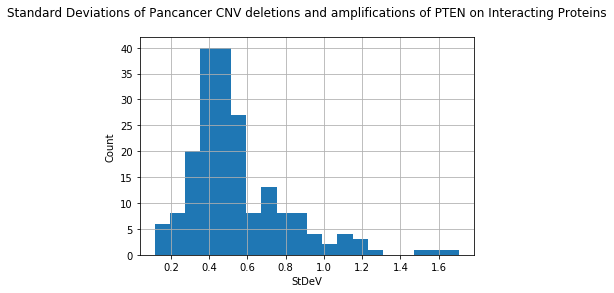

In [45]:
a = stdev.hist(bins = 20)
plt.title("Standard Deviations of Pancancer CNV deletions and amplifications of PTEN on Interacting Proteins\n")
plt.xlabel('StDeV')
plt.ylabel('Count')

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'StDeV')]

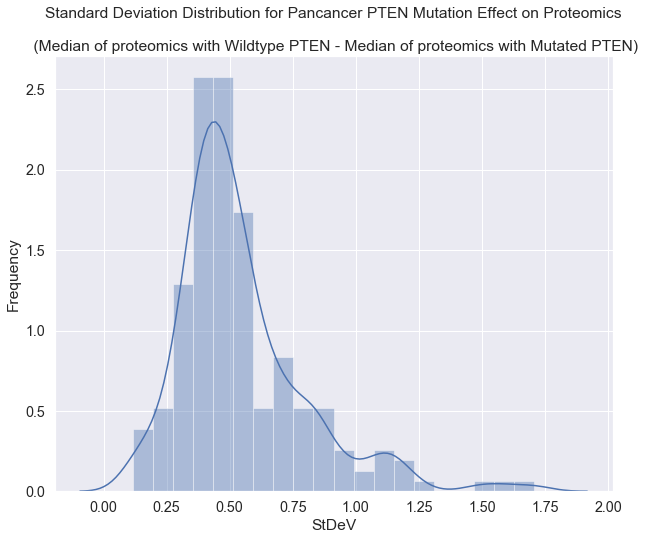

In [46]:
plt.rcParams['figure.figsize']=(10,8)
sns.set(font_scale = 1.3)
a = sns.distplot(stdev, bins = 20)

a.set_title("Standard Deviation Distribution for Pancancer PTEN Mutation Effect on Proteomics\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
a.set(xlabel = 'StDeV', ylabel = 'Frequency')

Mean

In [47]:
mean_df = stdev.mean()

Text(0, 0.5, 'Count')

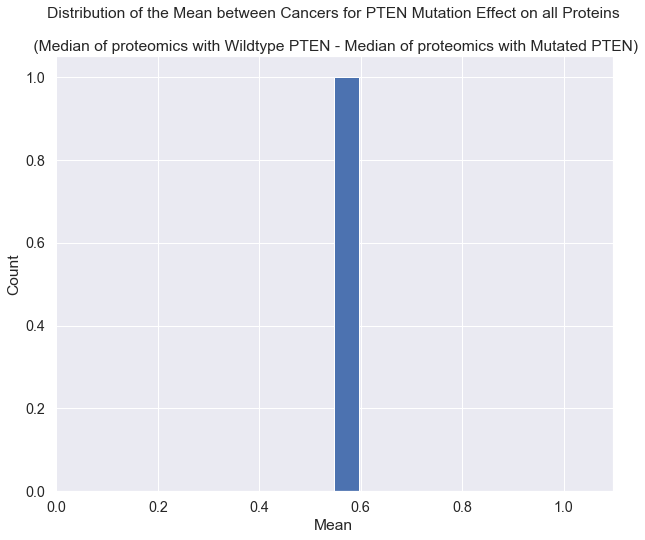

In [48]:
a = mean_df.hist(bins = 20)
plt.title("Distribution of the Mean between Cancers for PTEN Mutation Effect on all Proteins\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('Mean')
plt.ylabel('Count')

In [49]:
m_df = stdev.median()

Text(0, 0.5, 'Count')

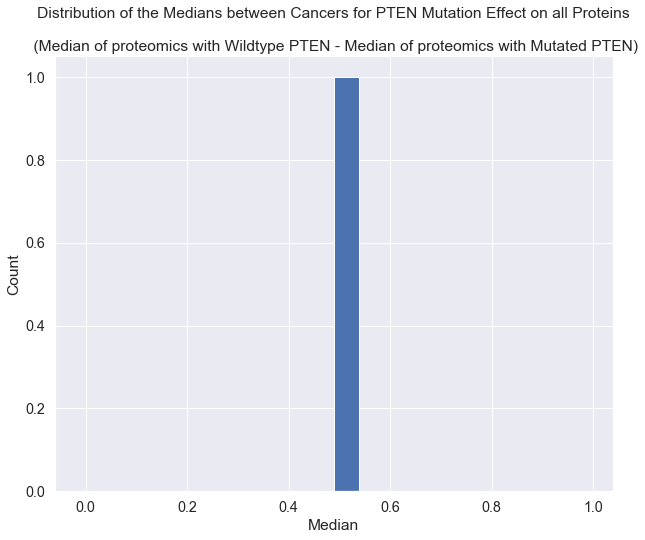

In [50]:
a = m_df.hist(bins = 20)
plt.title("Distribution of the Medians between Cancers for PTEN Mutation Effect on all Proteins\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('Median')
plt.ylabel('Count')